WQD7006 MACHINE LERNING FOR DATA SCIENCE 
INDIVIDUAL ASSIGNMENT

TITLE: SENTIMENT ANALYSIS OF COVID-19 VACCINE TWEETS USING MACHINE LEARNING MODELS

This file contains processes of 
    1. Expploring Data 
    2. Cleaning Data 
    3. Pre-processing Text 

The processes related to training models are contained in 2-train.ipynb file.

In [3]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string

In [4]:
# Load data set
# Change working directory to script location
os.chdir(sys.path[0])

# Load the dataset to variable 'df'
df = pd.read_csv('covid-19_vaccine_tweets_with_sentiment.csv', engine='python', index_col=False)

1. EXPLORING DATA 

In [5]:
#First five observations of the dataset
df.head() 

,tweet_id,label,tweet_text
0,1.360340e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382900e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375670e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381310e+18,1,"Confirmation that Chinese #vaccines ""don�t hav..."
4,1.362170e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [6]:
#Show metadata of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    6000 non-null   float64
 1   label       6000 non-null   int64  
 2   tweet_text  6000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 140.8+ KB


<AxesSubplot:xlabel='label'>

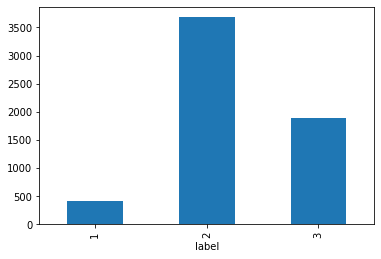

In [7]:
#Show frequecy distribution of the 'label' attribute
df.groupby('label').size() 

fig, ax = plt.subplots()
df.groupby('label').size().plot.bar()

2. CLEANING DATA 

In [8]:
# Drop all duplicated values
# df.sort_values("tweet_text", inplace = True)
# df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True)

In [9]:
# Remove 'tweet_id' attribute
df = df.drop('tweet_id', 1)

# Show first five row after cleaning
df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_13296/1754958178.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tweet_id', 1)


,label,tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ..."
1,2,Pranam message for today manifested in Dhyan b...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1,"Confirmation that Chinese #vaccines ""don�t hav..."
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


3. PRE-PROCESSING TEXT

In [10]:
# 3.1 Case Folding
df['new_tweet_text'] = df['tweet_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,label,tweet_text,new_tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ...","4,000 a day dying from the so called covid-19 ..."
1,2,Pranam message for today manifested in Dhyan b...,pranam message for today manifested in dhyan b...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabad-based ?@bharatbiotech? has sought fu...
3,1,"Confirmation that Chinese #vaccines ""don�t hav...","confirmation that chinese #vaccines ""don�t hav..."
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines...","lab studies suggest #pfizer, #moderna vaccines..."


In [11]:
# 3.2 Symbol Filtering
# Remove symbol and speacial symbol ï¿½
rem = string.punctuation
pattern = r"[{}]".format(rem)
df['new_tweet_text'] = df['new_tweet_text'].str.replace(pattern, ' ')
df['new_tweet_text'] = df['new_tweet_text'].str.replace('�', '')

# Remove link
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

for i in range(len(df)):
    df.loc[i, 'new_tweet_text'] = denoise_text(df.loc[i, 'new_tweet_text'])

df['new_tweet_text'] = df['new_tweet_text'].str.replace('http\S+|www.\S+', '', case=False)
df['new_tweet_text'] = df['new_tweet_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

# Remove '@username'
df['new_tweet_text'] = df['new_tweet_text'].str.replace('@[^\s]+','', case=False)

# Remove '#topic'
df['new_tweet_text'] = df['new_tweet_text'].str.replace('#[^\s]+','', case=False)

df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_13296/2593164209.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_tweet_text'] = df['new_tweet_text'].str.replace(pattern, ' ')
C:\Users\user\AppData\Local\Temp/ipykernel_13296/2593164209.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_tweet_text'] = df['new_tweet_text'].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\user\AppData\Local\Temp/ipykernel_13296/2593164209.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_tweet_text'] = df['new_tweet_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
C:\Users\user\AppData\Local\Temp/ipykernel_13296/2593164209.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_tweet_text'] = df['new_tweet_text'].s

,label,tweet_text,new_tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ...",4 000 a day dying from the so called covid 19 ...
1,2,Pranam message for today manifested in Dhyan b...,pranam message for today manifested in dhyan b...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabad based bharatbiotech has sought fu...
3,1,"Confirmation that Chinese #vaccines ""don�t hav...",confirmation that chinese vaccines dont have...
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studies suggest pfizer moderna vaccines...


In [12]:
# 3.3 Stopword Removing
stop = stopwords.words('english')
df['new_tweet_text'] = df['new_tweet_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,label,tweet_text,new_tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ...",4 000 day dying called covid 19 vaccine dailyb...
1,2,Pranam message for today manifested in Dhyan b...,pranam message today manifested dhyan meenapra...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabad based bharatbiotech sought funds gov...
3,1,"Confirmation that Chinese #vaccines ""don�t hav...",confirmation chinese vaccines dont high protec...
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studies suggest pfizer moderna vaccines pr...


In [13]:
# 3.5 Lemmatization
import spacy
sp = spacy.load('en_core_web_sm')
def space(sentence):
    doc = sp(sentence)
    return ' '.join([token.lemma_ for token in doc])

df['new_tweet_text'] = df['new_tweet_text'].apply(space)
df.head()

,label,tweet_text,new_tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ...",4 000 day die call covid 19 vaccine dailybeast...
1,2,Pranam message for today manifested in Dhyan b...,pranam message today manifest dhyan meenaprana...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabad base bharatbiotech seek fund governm...
3,1,"Confirmation that Chinese #vaccines ""don�t hav...",confirmation chinese vaccine do not high prote...
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab study suggest pfizer moderna vaccine prote...


4. DATA SAMPLING

In [14]:
# 4.1 Save processed data for backup
df = df.drop('tweet_text', 1)
df.to_csv('processed_tweets.csv', index=False)

C:\Users\user\AppData\Local\Temp/ipykernel_13296/2330719305.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tweet_text', 1)


In [15]:
# 4.2 Split data to two set: train set and predict set

#Change negative label from 1 to 0
df.loc[df.label == 1, 'label'] = 0

#Change positive label from 3 to 1
df.loc[df.label == 3, 'label'] = 1

#Rows that annotated as 0 or 1, the negative and positive, saved to train set
df1 = df.loc[(df['label'] == 1) | (df['label'] == 0)]
df1.to_csv('train.csv', index=False)

#Rows that are labeled as 2, the nuetral sentiment, are split into predict dataset
df2 = df.loc[df['label'] == 2]
df2.to_csv('predict.csv', index=False)

In [16]:
# Show class disribution of df1
df1.groupby('label').size() 

label
0     420
1    1900
dtype: int64

In [17]:
# Show class disribution of df2
df2.groupby('label').size() 

label
2    3680
dtype: int64